In [1]:
%matplotlib inline

import numpy as np

from fussed_lasso import FusedLasso

# Demo

In [2]:
X = np.random.rand(20,2) 
y = np.array(range(20)) 
x = np.array([1.0,1.0]) 

model = FusedLasso()
model.fit(X,y)

model.predict(x)

7.4898445425356766

# Example

## Generate random numbers

In [2]:
def check_area1(p):
    if (p>0.45) and (p<0.55):
        return True
    else:
        return False
def check_area2(p):
    if (p>0.4) and (p<0.6):
        return True
    else:
        return False

def get_rand_num(n): 
    final_obs = []
    count1 = 0
    count2 = 0
    count3 = 0
    
    while (count1+count2+count3<n):
        p = np.random.uniform(size=2) 
        if check_area1(p[0]) and check_area1(p[1]): 
            count1+=1
            final_obs.append(p)
        elif check_area2(p[0]) and check_area2(p[1]):
            check = 1.0/4.0/3
            if np.random.uniform()<check:
                count2+=1
                final_obs.append(p)
        else:
            check = 5.0/16.0/96
            if np.random.uniform()<check:
                count3+=1
                final_obs.append(p)
    #print( (count1,count2,count3) )
    return np.array(final_obs)
        

## Define f(x)

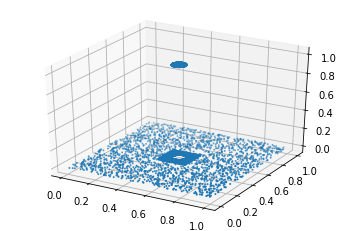

In [3]:
def f(x):
    c = np.array([0.5,0.5]) 
    y = (np.sum((x-c)**2, axis=1)<=0.002)
    return y.astype(float)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

num_obs = 10000
X = get_rand_num(num_obs) 

s = np.random.normal(0, np.sqrt(0.5)/2, num_obs)
y = f(X) + s

#Visualize f
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = f(X)

ax.scatter(xs, ys, zs, s=1)

## Find a good hyperparamter

*TODO*: Change `repeat` to 100, `num_obs` to 5000. And consider a larger range of $\alpha$.

In [4]:
num_obs = 500
sd = np.sqrt(0.5)/2

alpha_range = [x * 0.1 for x in range(1, 11)]

MSE_list = []
for alpha in alpha_range:
    MSE = 0
    repeat = 5
    for i in range(repeat):
        #generate random data
        X = get_rand_num(num_obs) 
        s = np.random.normal(0, sd , num_obs)
        y = f(X) + s
        
        #Fitting our model
        model = FusedLasso()
        model.fit(X,y, alpha=0.05)

        MSE = MSE + model.MSE
    MSE = MSE/repeat
    MSE_list.append( (alpha, MSE) )

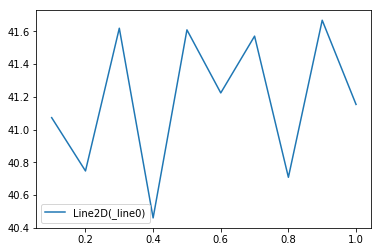

In [13]:
data = np.array(MSE_list)

fig, ax = plt.subplots()
lines = ax.plot(data[:,0],data[:,1])
ax.legend(lines)

In [14]:
num_obs = 500
sd = np.sqrt(0.5)/2

X = get_rand_num(num_obs) 
s = np.random.normal(0, sd , num_obs)
y = f(X) + s
        
#Fitting our model
model = FusedLasso()
model.fit(X,y, alpha=0.4)

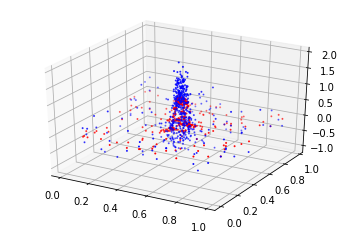

In [15]:
#Plot them together
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = model.theta

ax.scatter(xs, ys, y,c='blue',s=1)
ax.scatter(xs, ys, zs,c='red',s=1)

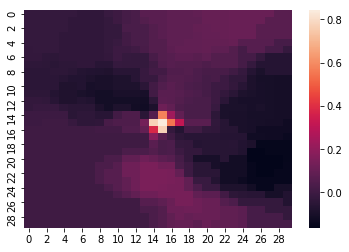

In [16]:
#Heatmap
import seaborn as sns

num = 30
XX = range(num)
YY = range(num)
xx, yy = np.meshgrid(XX, YY) 
pairs = np.vstack([ xx.reshape(-1), yy.reshape(-1) ]).T
heat_map = np.zeros( (num,num) )
for idx in pairs:
    val = np.array(idx)/num
    val = val.astype('float32') 
    y = model.predict(val)
    heat_map[idx[0],idx[1]] = y 
sns.heatmap(heat_map)

The result above doesn't look well. It is because our dataset is too small. Choose a easier function $f$: the result looks much better. 

# Example


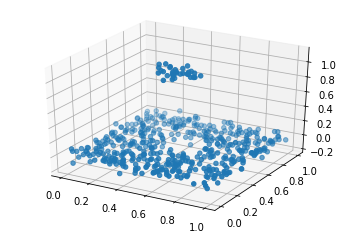

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#Generate data
num = 500

X = np.random.rand(num,2)
X = X.astype('float32')
 
def f(x):
    center = np.array([0.5,0.5])
    y = np.sum((x- center)**2,1) 
    y = (y<0.02)
    return y.astype('float32')
epsilon = np.random.normal(loc=0.0, scale=0.05, size=num)
y = f(X) + epsilon

#Visualize data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = y

ax.scatter(xs, ys, zs)

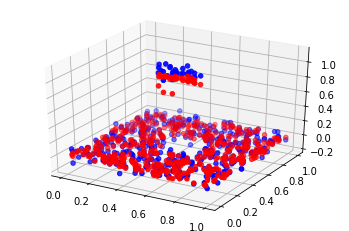

In [4]:
#Fitting our model
model = FusedLasso()
model.fit(X,y, alpha=0.1)

#Plot them together
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = model.theta

ax.scatter(xs, ys, y,c='blue')
ax.scatter(xs, ys, zs,c='red')

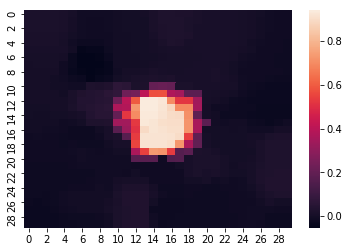

In [5]:
#Heatmap
import seaborn as sns

num = 30
XX = range(num)
YY = range(num)
xx, yy = np.meshgrid(XX, YY) 
pairs = np.vstack([ xx.reshape(-1), yy.reshape(-1) ]).T
heat_map = np.zeros( (num,num) )
for idx in pairs:
    val = np.array(idx)/num
    val = val.astype('float32') 
    y = model.predict(val)
    heat_map[idx[0],idx[1]] = y 
sns.heatmap(heat_map)